## Libraries

In [1]:
import numpy as np
import imageio

## Code

In [50]:
#cellpose labels
labels_image1_path = "/home/s361852/Schreibtisch/in-situ-seq-segmentation/data/segmentation_3nt_nuc_non_mutant/corr_param_output/6Inc_PR8_Nepal_1MOI_4hpi_AllSegments_3R_50C__Region 11_Processed001_s08_ch00_cp_masks.png"

#ground truth
labels_image2_path = "/home/s361852/Schreibtisch/in-situ-seq-segmentation/data/segmentation_3nt_nuc_non_mutant/ground_truth/GT_nuc_6Inc_PR8_Nepal_1MOI_4hpi_AllSegments_3R_50C__Region 11_Processed001_s08_ch00.tif"

In [51]:
labels_image1 = imageio.imread(labels_image1_path)
labels_image2 = imageio.imread(labels_image2_path)

/tmp/ipykernel_4143969/3857874515.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  labels_image1 = imageio.imread(labels_image1_path)
/tmp/ipykernel_4143969/3857874515.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  labels_image2 = imageio.imread(labels_image2_path)


In [52]:
def compute_overlap_matrix(labels1, labels2):
    max_label1 = labels1.max()
    max_label2 = labels2.max()
    overlap_matrix = np.zeros((max_label1 + 1, max_label2 + 1), dtype=np.int32)

    for label1 in range(1, max_label1 + 1):
        mask1 = (labels1 == label1)
        for label2 in range(1, max_label2 + 1):
            mask2 = (labels2 == label2)
            overlap_matrix[label1, label2] = np.sum(mask1 & mask2)

    return overlap_matrix


overlap_matrix = compute_overlap_matrix(labels_image1, labels_image2)
print(overlap_matrix)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [53]:
label_mapping = {}
rows, cols = overlap_matrix.shape

In [54]:
# Iteration über die Labels in labels_image1
for label1 in range(1, rows):
    max_overlap = 0
    best_match = 0
    for label2 in range(1, cols):
        overlap = overlap_matrix[label1, label2]
        if overlap > max_overlap:
            max_overlap = overlap
            best_match = label2
    if best_match != 0:
        label_mapping[label1] = best_match

print("Label Mapping:", label_mapping)

Label Mapping: {1: 17, 2: 15, 3: 11, 4: 18, 5: 20, 6: 8, 7: 12, 8: 21, 9: 19, 10: 27, 11: 28, 12: 9, 13: 5, 14: 30, 15: 6, 16: 83, 17: 82, 18: 81, 19: 13, 20: 10, 21: 31, 22: 32, 23: 80, 24: 7, 25: 111, 26: 79, 27: 33, 28: 84, 29: 85, 30: 112, 31: 34, 32: 1, 33: 2, 34: 3, 35: 4, 36: 113, 37: 114, 38: 86, 39: 87, 40: 35, 41: 110, 42: 41, 43: 36, 44: 88, 45: 40, 46: 89, 47: 38, 48: 78, 49: 109, 50: 42, 51: 43, 52: 39, 53: 90, 54: 44, 55: 76, 56: 104, 57: 106, 58: 108, 59: 75, 60: 107, 61: 77, 62: 91, 63: 103, 64: 105, 65: 47, 66: 46, 67: 102, 68: 48, 69: 97, 70: 45, 71: 73, 72: 101, 73: 95, 74: 100, 75: 92, 76: 72, 77: 50, 78: 96, 79: 51, 80: 99, 81: 71, 82: 94, 83: 70, 84: 52, 85: 98, 86: 68, 87: 63, 88: 53, 89: 69, 90: 62, 91: 64, 92: 59, 93: 54, 94: 67, 95: 66, 96: 56, 97: 60, 98: 93, 99: 57, 100: 58, 101: 55}


In [55]:
jaccard_indices = {}
dice_coefficients = {}

In [56]:
# Anzahl der einzigartigen Labels in jedem Bild bestimmen
num_labels_image1 = np.unique(labels_image1).size - 1  # Subtrahiere 1, um den Hintergrund (0) auszuschließen
num_labels_image2 = np.unique(labels_image2).size - 1  # Subtrahiere 1, um den Hintergrund (0) auszuschließen

print("Anzahl der Labels in image1:", num_labels_image1)
print("Anzahl der Labels in image2:", num_labels_image2)


Anzahl der Labels in image1: 101
Anzahl der Labels in image2: 114


In [57]:
for label1, label2 in label_mapping.items():
    intersection = overlap_matrix[label1, label2]
    union = np.sum(labels_image1 == label1) + np.sum(labels_image2 == label2) - intersection
    dice = 2 * intersection / (np.sum(labels_image1 == label1) + np.sum(labels_image2 == label2))
    
    jaccard_indices[label1] = intersection / union if union > 0 else 0
    dice_coefficients[label1] = dice

print("Jaccard Indices:", jaccard_indices)
print("Dice Coefficients:", dice_coefficients)

Jaccard Indices: {1: 0.904, 2: 0.8952874158467116, 3: 0.856507864144062, 4: 0.9083229813664596, 5: 0.5960899315738025, 6: 0.9219797704284578, 7: 0.8219342773176597, 8: 0.8531754813011728, 9: 0.8041282778171509, 10: 0.8681107099879664, 11: 0.8693224686886978, 12: 0.8517844964764719, 13: 0.9172336271667751, 14: 0.8772007042253521, 15: 0.8516707416462918, 16: 0.8603116208612854, 17: 0.848004213976355, 18: 0.8475066249096603, 19: 0.733709348373935, 20: 0.9139737717261718, 21: 0.7903332597660561, 22: 0.7961224993825636, 23: 0.7809342954804406, 24: 0.9161548547374232, 25: 0.8465740164557837, 26: 0.8448112312654146, 27: 0.8551867219917012, 28: 0.8606330566241479, 29: 0.8427239991527219, 30: 0.6529247910863509, 31: 0.861210967787411, 32: 0.8530965321901554, 33: 0.8520814880425155, 34: 0.8749138525155066, 35: 0.8925218366107712, 36: 0.6530334014996592, 37: 0.8210653753026634, 38: 0.785645933014354, 39: 0.7760249961896053, 40: 0.9004284649776453, 41: 0.868023677216719, 42: 0.7657115338309656, 43

In [58]:
import pandas as pd

# Umwandlung der Dictionaries in DataFrames
df_jaccard = pd.DataFrame(list(jaccard_indices.items()), columns=['Item', 'Jaccard Index'])
df_dice = pd.DataFrame(list(dice_coefficients.items()), columns=['Item', 'Dice Coefficient'])

# Speichern in einer Excel-Datei mit zwei verschiedenen Blättern (Sheets)
with pd.ExcelWriter('/home/s361852/Schreibtisch/in-situ-seq-segmentation/data/segmentation_3nt_nuc_non_mutant/Dice_score/output.xlsx') as writer:
    df_jaccard.to_excel(writer, sheet_name='Jaccard Indices', index=False)
    df_dice.to_excel(writer, sheet_name='Dice Coefficients', index=False)

In [59]:
import matplotlib.pyplot as plt

Anzahl der Labels im remapped Image: 101


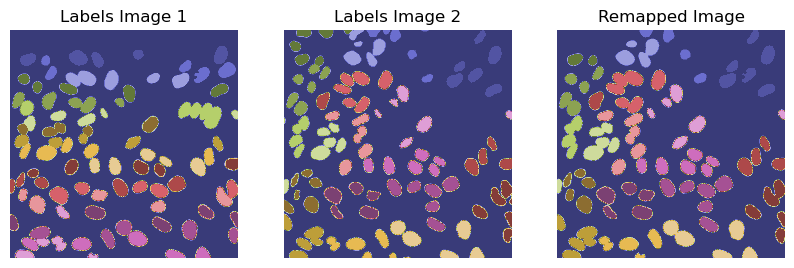

In [61]:
# Erstellen eines remapped Image basierend auf label_mapping
remapped_image = np.zeros_like(labels_image1)
for label1, label2 in label_mapping.items():
    remapped_image[labels_image1 == label1] = label2

# Anzahl der einzigartigen Labels im remapped Image bestimmen
num_labels_remapped_image = np.unique(remapped_image).size - 1  # Subtrahiere 1, um den Hintergrund (0) auszuschließen

print("Anzahl der Labels im remapped Image:", num_labels_remapped_image)

# Anzeige des remapped Images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Labels Image 1')
plt.imshow(labels_image1, cmap='tab20b')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Labels Image 2')
plt.imshow(labels_image2, cmap='tab20b')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Remapped Image')
plt.imshow(remapped_image, cmap='tab20b')
plt.axis('off')

plt.show()

In [62]:
remapped_image_save_path = "/home/s361852/Schreibtisch/in-situ-seq-segmentation/data/segmentation_3nt_nuc_non_mutant/remapped/remapped_image.png"

# Speichern des remapped Images
imageio.imwrite(remapped_image_save_path, remapped_image)